,dataset,speed,snr,baseline_acc,random_acc,dqn_acc,baseline_reward,random_reward,dqn_reward
0,beam_dataset_speed120_snr10.csv,120,10,0.985833,0.062500,0.960000,1183.0,75.0,1152.0
1,beam_dataset_speed120_snr20.csv,120,20,0.977500,0.067333,0.951667,1173.0,80.8,1142.0
2,beam_dataset_speed120_snr30.csv,120,30,0.981667,0.066833,0.929167,1178.0,80.2,1115.0
3,beam_dataset_speed30_snr10.csv,30,10,0.982500,0.064667,0.945000,1179.0,77.6,1134.0
4,beam_dataset_speed30_snr20.csv,30,20,0.990833,0.060000,0.951667,1189.0,72.0,1142.0
5,beam_dataset_speed30_snr30.csv,30,30,0.982500,0.065667,0.937500,1179.0,78.8,1125.0
6,beam_dataset_speed60_snr10.csv,60,10,0.983333,0.062167,0.962500,1180.0,74.6,1155.0
7,beam_dataset_speed60_snr20.csv,60,20,0.983333,0.061500,0.951667,1180.0,73.8,1142.0
8,beam_dataset_speed60_snr30.csv,60,30,0.969167,0.059167,0.928333,1163.0,71.0,1114.0


/Users/ray/Desktop/side project/RL-based Beam Selection in High-Mobility Wireless Environments/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/ray/Desktop/side project/RL-based Beam Selection in High-Mobility Wireless Environments/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/ray/Desktop/side project/RL-based Beam Selection in High-Mobility Wireless Environments/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  fun

<Figure size 1000x500 with 0 Axes>

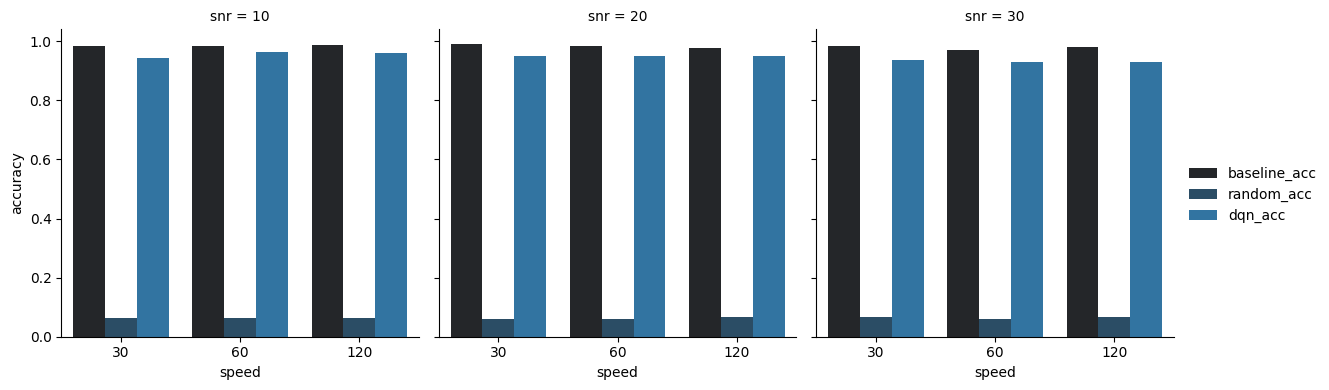

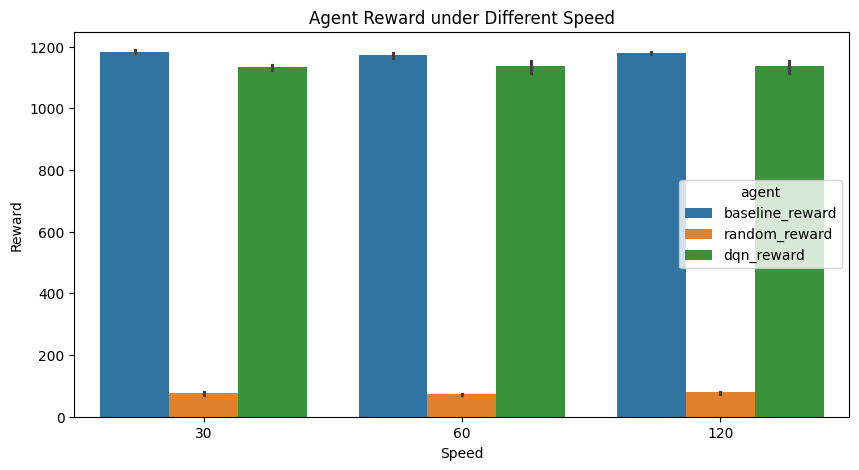

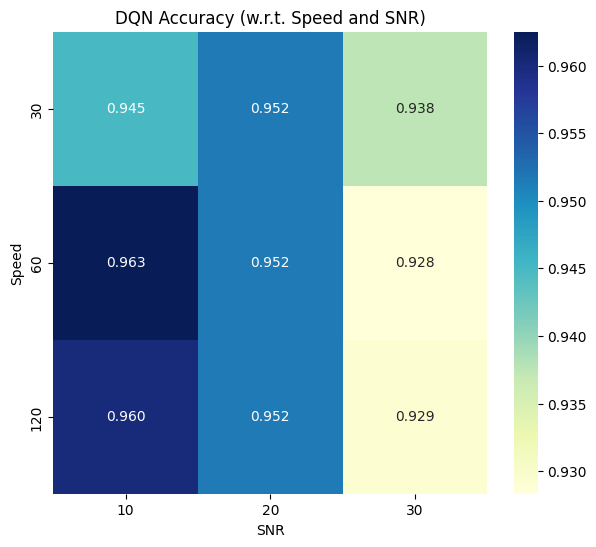

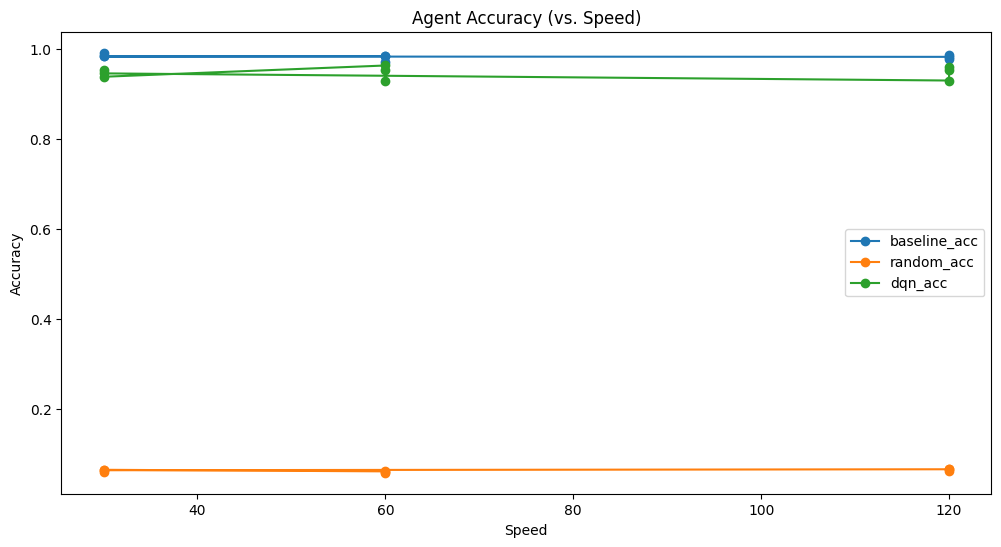

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

summary = pd.read_csv("../results/summary_all.csv")
display(summary)

# 1. Barplot of Agent Accuracy
plt.figure(figsize=(10, 5))
# summary_melt = summary.melt(
#     id_vars=["speed", "snr"],
#     value_vars=["baseline_acc", "random_acc", "dqn_acc"],
#     var_name="agent", value_name="accuracy"
# )
# sns.barplot(data=summary_melt, x="speed", y="accuracy", hue="agent")
# plt.title("Agent Accuracy under Different Speed")
# plt.xlabel("Speed")
# plt.ylabel("Accuracy")
# plt.show()
summary_melt = summary.melt(
    id_vars=["speed", "snr"],
    value_vars=["baseline_acc", "random_acc", "dqn_acc"],
    var_name="agent", value_name="accuracy"
)

g = sns.FacetGrid(summary_melt, col="snr", col_wrap=3, height=4)
g.map_dataframe(sns.barplot, x="speed", y="accuracy", hue="agent")
g.add_legend()
plt.show()

# 2. Barplot of Agent Reward
plt.figure(figsize=(10, 5))
summary_melt = summary.melt(
    id_vars=["speed", "snr"],
    value_vars=["baseline_reward", "random_reward", "dqn_reward"],
    var_name="agent", value_name="reward"
)
sns.barplot(data=summary_melt, x="speed", y="reward", hue="agent")
plt.title("Agent Reward under Different Speed")
plt.xlabel("Speed")
plt.ylabel("Reward")
plt.show()

# 3. Heatmap (DQN accuracy vs. SNR/Speed)
pivot = summary.pivot(index='speed', columns='snr', values='dqn_acc')
plt.figure(figsize=(7, 6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("DQN Accuracy (w.r.t. Speed and SNR)")
plt.xlabel("SNR")
plt.ylabel("Speed")
plt.show()

# 4. (Optional) Line Plot: Each Agent under Different SNR/Speed
plt.figure(figsize=(12, 6))
for agent in ["baseline_acc", "random_acc", "dqn_acc"]:
    plt.plot(summary["speed"], summary[agent], marker="o", label=agent)
plt.legend()
plt.title("Agent Accuracy (vs. Speed)")
plt.xlabel("Speed")
plt.ylabel("Accuracy")
plt.show()
